Support vector Machine - Classification

In [1]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer         # classification dataset
from sklearn.model_selection import train_test_split     # splitting
from sklearn.preprocessing import StandardScaler         # scaling (critical for SVM)
from sklearn.svm import SVC                              # SVM classifier
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib                                            # save model

In [2]:
# Step 2: Load dataset
data = load_breast_cancer()                              # returns features + target
X = pd.DataFrame(data.data, columns=data.feature_names)  # convert to DataFrame
y = pd.Series(data.target)                               # labels (0 malignant, 1 benign)


In [3]:
# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# stratify=y → maintain class balance in train and test sets

In [4]:
# Step 4: Scale features (MANDATORY for SVM)
scaler = StandardScaler()                                # create scaler
X_train_scaled = scaler.fit_transform(X_train)           # fit on train data
X_test_scaled = scaler.transform(X_test)                 # transform test data

In [5]:
# Step 5: Initialize SVM model
svm_clf = SVC(
    kernel='rbf',            # 'rbf' handles nonlinear boundaries
    C=1.0,                   # soft-margin penalty (higher = stricter margin)
    gamma='scale',           # automatic gamma for RBF
    probability=True,        # needed for ROC/probability predictions
    random_state=42
)

In [7]:
# Step 6: Train SVM
svm_clf.fit(X_train_scaled, y_train)                      # SVM learns boundary


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [8]:
# Step 7: Predict classes + probabilities
y_pred = svm_clf.predict(X_test_scaled)                   # predicted labels
y_prob = svm_clf.predict_proba(X_test_scaled)[:, 1]       # probability of class 1

In [9]:
# Step 8: Evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

Accuracy: 0.9824561403508771
Precision: 0.9861111111111112
Recall: 0.9861111111111112
F1 Score: 0.9861111111111112


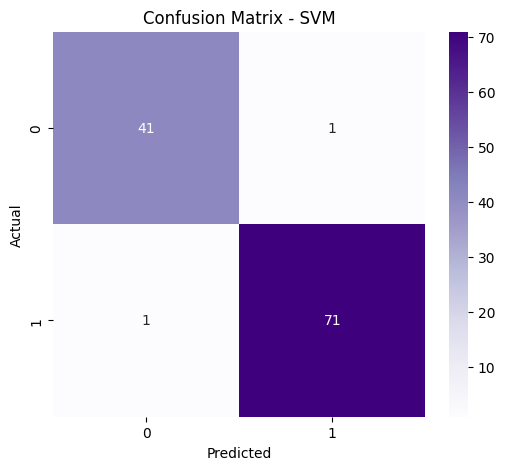

In [10]:
# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Purples", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()


In [11]:
# Step 10: Compare kernels
kernels = ["linear", "rbf", "poly"]
for k in kernels:
    temp_model = SVC(kernel=k, C=1.0, gamma='scale')
    temp_model.fit(X_train_scaled, y_train)
    y_temp_pred = temp_model.predict(X_test_scaled)
    print(f"Kernel={k}, Accuracy={accuracy_score(y_test, y_temp_pred)}")

Kernel=linear, Accuracy=0.9736842105263158
Kernel=rbf, Accuracy=0.9824561403508771
Kernel=poly, Accuracy=0.9122807017543859


In [12]:
# Step 11: Hyperparameter tuning (C & gamma)
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.1, 1, 10],
    "gamma": ["scale", 0.01, 0.1, 1],
    "kernel": ["rbf"]
}

grid = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='f1')
grid.fit(X_train_scaled, y_train)
print("Best Params:", grid.best_params_)


Best Params: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [13]:
# Step 12: Save model + predictions
joblib.dump(svm_clf, "C:\\Users\\Admin\\Documents\\Machine_Learning\\Supervised Learning\\ML_SupervisedLearning\\Models\\svm_model.pkl")
pd.DataFrame({"Actual": y_test, "Predicted": y_pred}).to_csv("C:\\Users\\Admin\\Documents\\Machine_Learning\\Supervised Learning\\ML_SupervisedLearning\\Predictions\\SVM_Predictions.csv", index=False)